In [1]:
import pandas as pd
import seaborn as sns; sns.set_style("dark")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd ..

/workspace/asurion_f22_muby


In [3]:
df = pd.read_csv("fe_data_v2/sale_data/train_sale_encoded.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953112 entries, 0 to 953111
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          953112 non-null  object 
 1   quality_sale                953112 non-null  int64  
 2   accepted_flg                953112 non-null  int64  
 3   clndr_dt_cst                953112 non-null  object 
 4   start_dt                    953112 non-null  object 
 5   lines                       953112 non-null  int64  
 6   previous_tech_support_call  953112 non-null  int64  
 7   account_tenure              953112 non-null  int64  
 8   past_yr_claim_count         953112 non-null  int64  
 9   num_decline                 953112 non-null  int64  
 10  exp                         953112 non-null  int64  
 11  product_type                953112 non-null  object 
 12  pmake                       953112 non-null  object 
 13  claritas_hh_co

In [5]:
df["hh_income"] = df["hh_income"].replace(['1 Wealthy', '3 Upper Midscale', '4 Midscale', 'Unknown',
                                           '7 Low Income', '2 Upscale', '6 Downscale', '5 Lower Midscale'],
                                          ['Wealthy', 'Upper Midscale', 'Midscale', 'Unknown',
                                           'Low Income', 'Upscale', 'Downscale', 'Lower Midscale'])
df["urbanicity"] = df["urbanicity"].replace(["7 Metro Mix","Unknown", "8 Mix", "5 Rural"],
                                            ["Metro Mix","Unknown", "Mix", "Rural"])
df["hh_education"] = df["hh_education"].replace(['1 Graduate Plus', '2 College Graduate', '3 Some College',
                                                 'Unknown', '4 High School'],
                                                ['Graduate Plus', 'College Graduate', 'Some College','Unknown', 
                                                 'High School'])
df["hh_tenure"] = df["hh_tenure"].replace(['1 Homeowners', '5 Renters', '2 Mostly Owners', 'Unknown',
                                           '4 Mostly Renters', '3 Mix'],
                                          ['Homeowners', 'Renters', 'Mostly Owners', 'Unknown',
                                           'Mostly Renters', 'Mix'])
df["hh_composition"] = df["hh_composition"].replace(['5 w/o Kids', '1 w/ Kids', 'Unknown', '4 Mostly w/o Kids',
                                                     '3 Family Mix'],
                                                    ['w/o Kids', 'w/ Kids', 'Unknown', 'Mostly w/o Kids', 'Family Mix'])
df["age_class"] = df["age_class"].replace(['3 Older', '2 Middle Age', '1 Younger', 'Unknown', '4 Mature'],
                                          ['Older', 'Middle Age', 'Younger', 'Unknown', 'Mature'])

In [6]:
def barplot_comparison(variable):
    df_new = df.groupby([variable,"quality_sale"], as_index = False).size()
    df_new = df_new.pivot_table(index = variable, values = "size", columns = "quality_sale")
    df_new = df_new.fillna(0)
    df_new["total_calls"] = df_new[0] + df_new[1]
    df_new["prop_accepted"] = df_new.loc[:,1]/(df_new.loc[:,0] + df_new.loc[:,1])
    df_new[variable] = df_new.index
    df_new = df_new.reset_index(drop = True)
    df_new = df_new.rename_axis(None, axis=1)
    
    df_new1 = df_new.sort_values("total_calls", ascending = False)
    plt.figure(figsize = (8,6))
    sns.barplot(x = variable, data = df_new1, y = "total_calls", color = "blue")
    plt.xticks(rotation = 45)
    plt.title("Total calls based on " + variable)
    plt.show();
    
    df_new2 = df_new.sort_values("prop_accepted", ascending = False)
    plt.figure(figsize = (8,6))
    sns.barplot(x = variable, data = df_new2, y = "prop_accepted", color = "green")
    plt.xticks(rotation = 45)
    plt.title("Propotion of calls whose sales were accepted based on " + variable)
    plt.show();

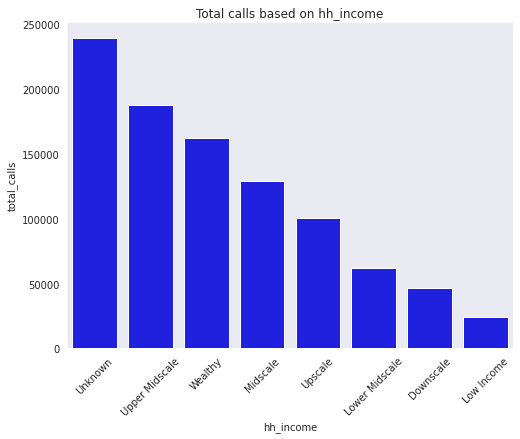

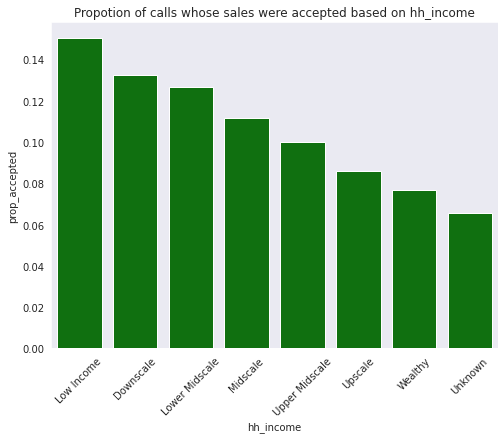

In [7]:
barplot_comparison("hh_income")

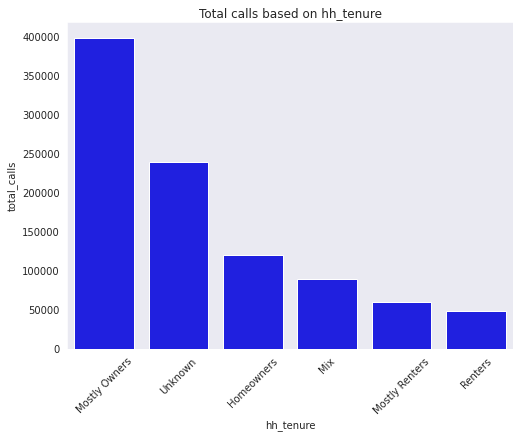

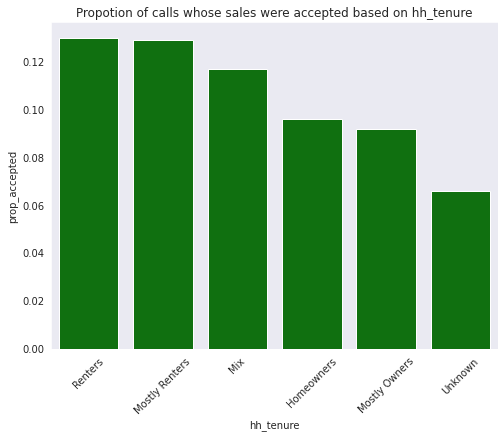

In [8]:
barplot_comparison("hh_tenure")

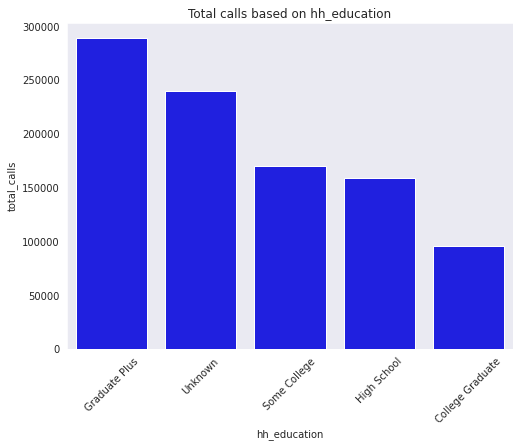

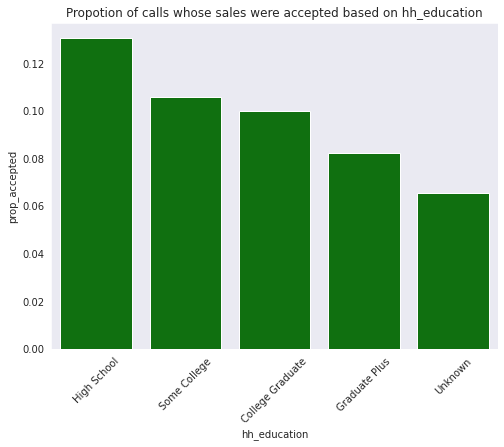

In [9]:
barplot_comparison("hh_education")

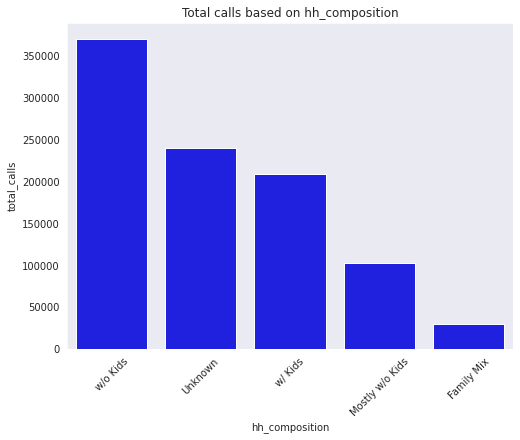

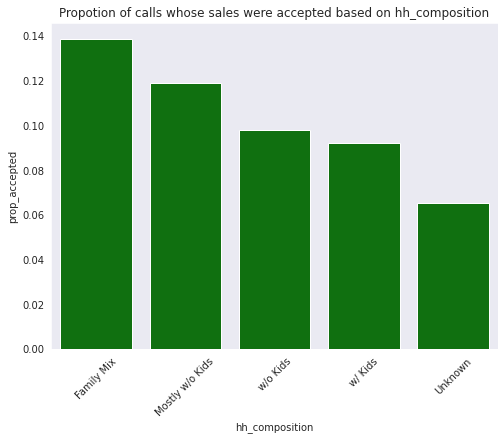

In [10]:
barplot_comparison("hh_composition")

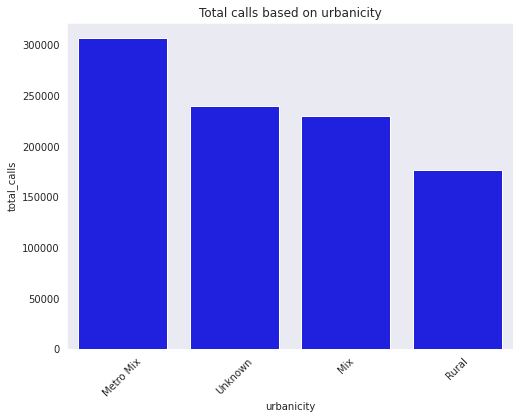

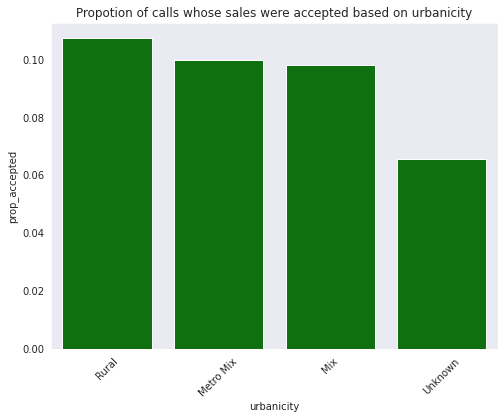

In [11]:
barplot_comparison("urbanicity")

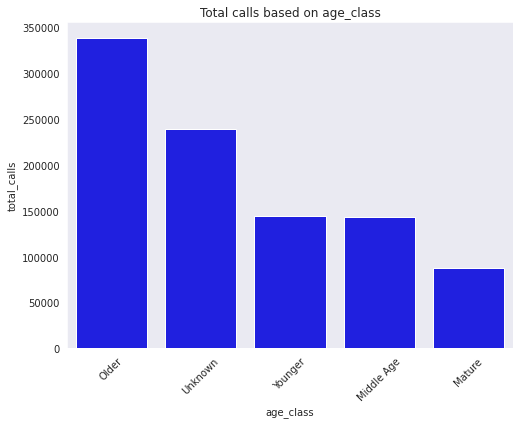

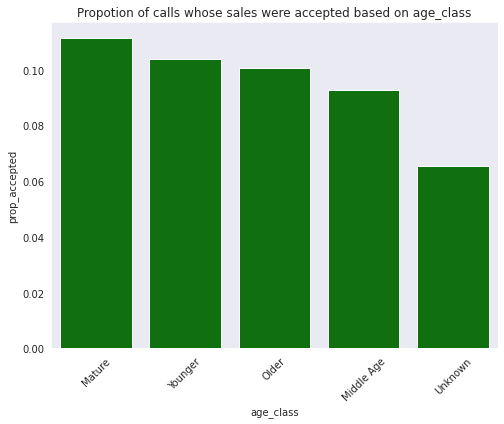

In [12]:
barplot_comparison("age_class")

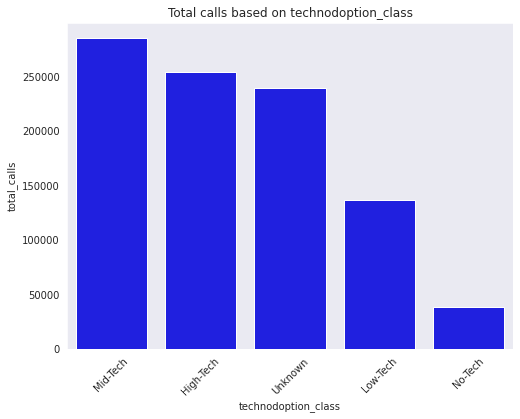

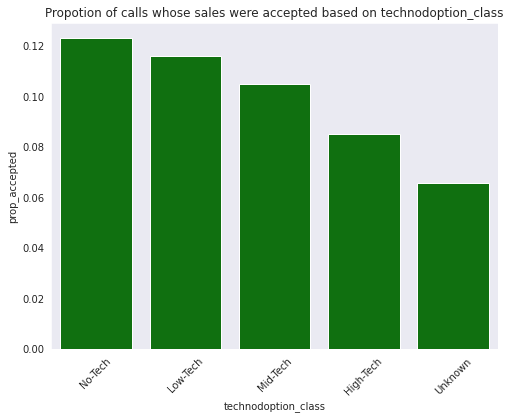

In [13]:
barplot_comparison("technodoption_class")

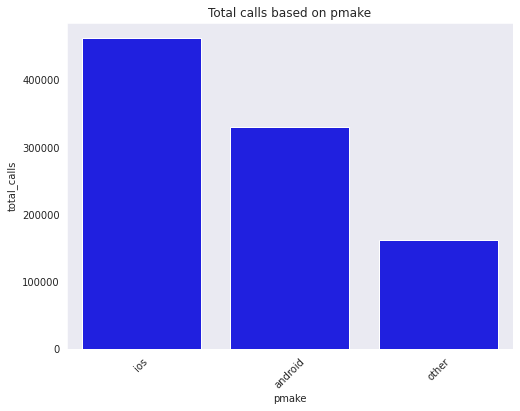

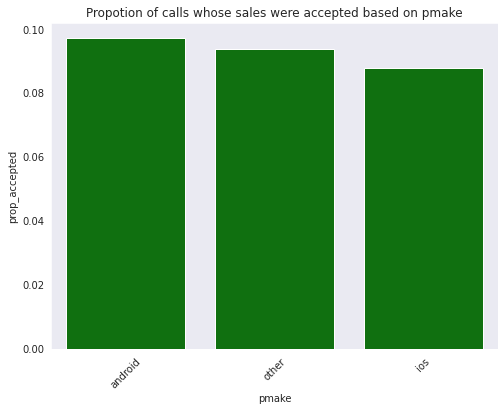

In [14]:
barplot_comparison("pmake")

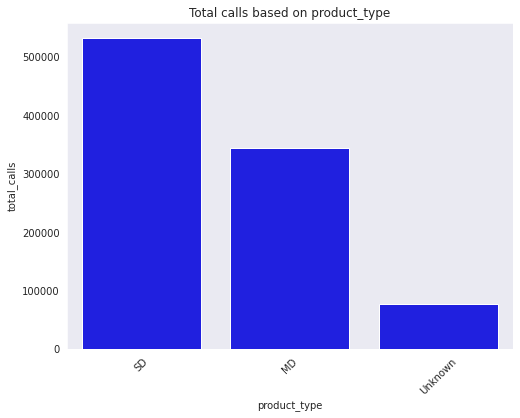

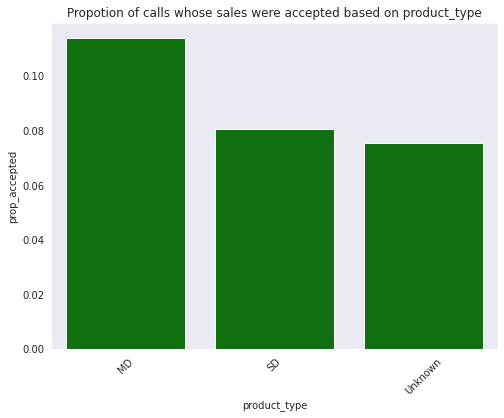

In [15]:
barplot_comparison("product_type")